## Data Collection and Preprocessing

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('bank-additional-full-varied-missing.csv')
pd.set_option('display.max_column', None)
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
26009,37.0,entrepreneur,married,university.degree,no,no,no,cellular,nov,wed,184,4.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
40240,42.0,unknown,single,NaN,no,no,no,cellular,jul,fri,366,6.0,999,0.0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,yes
20919,34.0,technician,single,university.degree,no,yes,no,telephone,aug,thu,313,1.0,999,0.0,nonexistent,1.4,93.444,NaN,4.964,5228.1,no
26967,NaN,admin.,divorced,university.degree,no,no,no,cellular,nov,thu,178,2.0,999,0.0,nonexistent,-0.1,93.200,NaN,4.076,5195.8,no
37221,34.0,admin.,married,university.degree,no,no,no,cellular,aug,fri,78,1.0,999,0.0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.isna().sum()

age                826
job               3343
marital           1196
education         2470
default              0
housing            918
loan                 0
contact              0
month              852
day_of_week          0
duration             0
campaign          2985
pdays                0
previous          1782
poutcome             0
emp.var.rate      3367
cons.price.idx    4834
cons.conf.idx     4910
euribor3m         1015
nr.employed          0
y                    0
dtype: int64

In [5]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols_to_encode = ['job','marital','education','default','housing','loan',
                  'contact','month','day_of_week','poutcome','y']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,261,1.0,999,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,149,1.0,999,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
2,37.0,0,1,3,0,2,0,1,6,1,226,1.0,999,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,151,1.0,999,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,307,1.0,999,0.0,1,1.1,93.575242,-36.4,4.857,5191.0,0


## Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
             'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
df[to_scale] = scaler.fit_transform(df[to_scale])

## Exploratory Data Analysis

In [11]:
y_percent = df['y'].value_counts(normalize=True)
print(y_percent * 100)

y
0    88.734583
1    11.265417
Name: proportion, dtype: float64


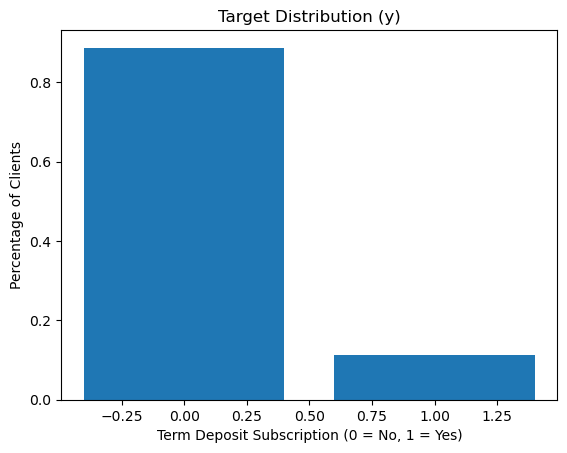

In [12]:
import matplotlib.pyplot as plt

plt.bar(y_percent.index, y_percent.values)

plt.title("Target Distribution (y)")
plt.xlabel("Term Deposit Subscription (0 = No, 1 = Yes)")
plt.ylabel("Percentage of Clients")

plt.show()


## Dividing the dataset into Feature and Target columns

In [13]:
x = df.drop('y', axis=1)
y = df['y']

## Splitting the dataset into Training and Testing Dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: y
0    29238
1     3712
Name: count, dtype: int64
After SMOTE: y
0    29238
1    29238
Name: count, dtype: int64


  File "C:\Users\Bhaskar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Bhaskar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhaskar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhaskar\anaconda3\Lib\sub

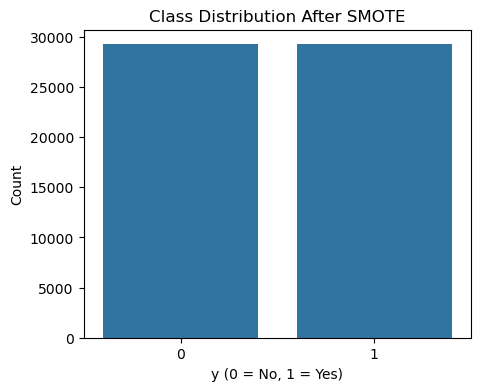

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("y (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [17]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
reg= LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [18]:
reg.score(x_train, y_train)

0.9095599393019727

In [19]:
reg.score(x_test, y_test)

0.9122359796067007

In [20]:
# Using GridSearchCV

C_values= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 100, 1000]
penalties= ['l1', 'l2']

parameters= {'C':C_values, 'penalty':penalties} # Grid Search takes paramgrid datatype as dictionary.

from sklearn.model_selection import GridSearchCV

grid= GridSearchCV(estimator= LogisticRegression(), param_grid=parameters, cv=5, scoring= 'accuracy')

In [21]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [22]:
grid.best_params_

{'C': 8, 'penalty': 'l2'}

In [23]:
# Creating the model using best parameters

lr= LogisticRegression(C=4, penalty= 'l2')
lr.fit(x_train, y_train)

LogisticRegression(C=4)

In [24]:
lr.score(x_train, y_train)

0.9095902883156297

In [25]:
lr.score(x_test, y_test)

0.9122359796067007

In [26]:
lr_y_pred= lr.predict(x_test)

In [27]:
# Model evaluation

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test, lr_y_pred))
print(accuracy_score(y_test, lr_y_pred))
ce=confusion_matrix(y_test, lr_y_pred)
print(ce)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.40      0.51       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

0.9122359796067007
[[7144  166]
 [ 557  371]]


In [28]:
lr_acc= accuracy_score(y_test, lr_y_pred)*100
lr_acc

91.22359796067006

In [29]:
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
rf.score(x_train, y_train)

1.0

In [31]:
rf.score(x_test, y_test)

0.9221898519058024

In [32]:
# Using Grid-SearcCV

parameters2= {'n_estimators':[10, 30, 50, 90], 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[5, 10, 15, 20, 25]}
grid2= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters2, cv=5, scoring= 'accuracy')

In [33]:
grid2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 30, 50, 90]},
             scoring='accuracy')

In [34]:
grid2.best_params_

{'criterion': 'log_loss', 'max_depth': 15, 'n_estimators': 50}

In [35]:
grid2.best_score_

np.float64(0.9131107738998482)

In [36]:
rfc= RandomForestClassifier(criterion= 'log_loss', max_depth= 5, n_estimators= 30)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=30)

In [37]:
rfc.score(x_train, y_train)

0.9063125948406677

In [38]:
rfc.score(x_test, y_test)

0.9058023792182569

In [39]:
rfc_y_pred2= rfc.predict(x_test)

In [40]:
# Model evaluation

print(classification_report(y_test, rfc_y_pred2))
print(accuracy_score(y_test, rfc_y_pred2))
ce2=confusion_matrix(y_test, rfc_y_pred2)
print(ce2)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.82      0.21      0.33       928

    accuracy                           0.91      8238
   macro avg       0.86      0.60      0.64      8238
weighted avg       0.90      0.91      0.88      8238

0.9058023792182569
[[7267   43]
 [ 733  195]]


In [41]:
rfc_acc= accuracy_score(y_test, rfc_y_pred2)*100
rfc_acc

90.58023792182568

In [42]:
# Using Desicion Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
dtc.score(x_test, y_test)

0.8917212915756252

In [44]:
dtc.score(x_train, y_train)

1.0

In [45]:
# Using Grid-SearchCV

parameters3= {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15, 20, 25], 'min_samples_leaf':[10, 20, 50, 100, 120]}

from sklearn.model_selection import GridSearchCV

grid3= GridSearchCV(estimator= DecisionTreeClassifier(), param_grid= parameters3, cv= 5, scoring= 'accuracy')

In [46]:
grid3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100, 120]},
             scoring='accuracy')

In [47]:
grid3.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 120}

In [48]:
grid3.best_score_

np.float64(0.9124734446130501)

In [49]:
dt= DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=50)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)

In [50]:
dt.score(x_train, y_train)

0.9150227617602428

In [51]:
dt.score(x_test, y_test)

0.9169701383831027

In [52]:
dt_y_pred3= dt.predict(x_test)

In [53]:
# Model evaluation

print(classification_report(y_test, dt_y_pred3))
print(accuracy_score(y_test, dt_y_pred3))
ce3=confusion_matrix(y_test, dt_y_pred3)
print(ce3)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.67      0.52      0.58       928

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238

0.9169701383831027
[[7075  235]
 [ 449  479]]


In [54]:
dt_acc= accuracy_score(y_test, dt_y_pred3)*100
dt_acc

91.69701383831027

In [55]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [56]:
svm.score(x_test,y_test)

0.910536537994659

In [57]:
svc_r1= SVC(kernel= 'rbf', C=1.0)
svc_r1.fit(x_train, y_train)

SVC()

In [58]:
svc_score= svc_r1.score(x_test, y_test)*100
svc_score

91.05365379946589

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
base_estimator = DecisionTreeClassifier(max_depth=2, random_state=42)
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,      
    learning_rate=0.5,
    random_state=42
)

In [61]:
adaboost.fit(x_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [62]:
y_pred_ada = adaboost.predict(x_test)

In [63]:
print(accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

0.9101723719349356
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.66      0.41      0.51       928

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

[[7119  191]
 [ 549  379]]


In [64]:
ada_acc= accuracy_score(y_test, y_pred_ada)*100
ada_acc

91.01723719349356

## Model Comparision

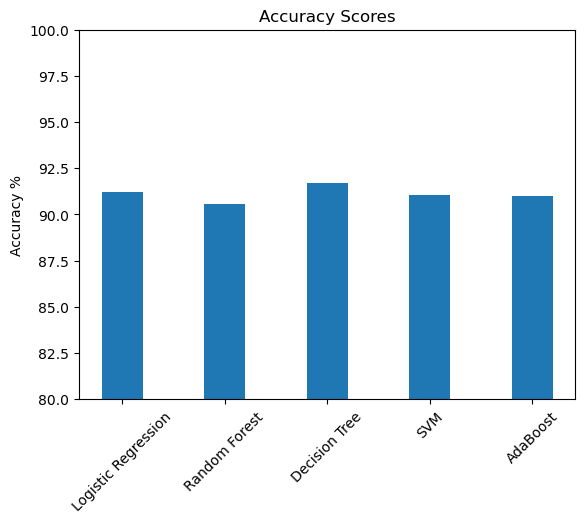

In [65]:
import matplotlib.pyplot as plt

plt.bar(['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'AdaBoost'], 
        [lr_acc, rfc_acc, dt_acc, svc_score, ada_acc], width= 0.4)

plt.ylim(80, 100)
plt.ylabel('Accuracy %')
plt.title('Accuracy Scores')
plt.xticks(rotation= 45)
plt.show()

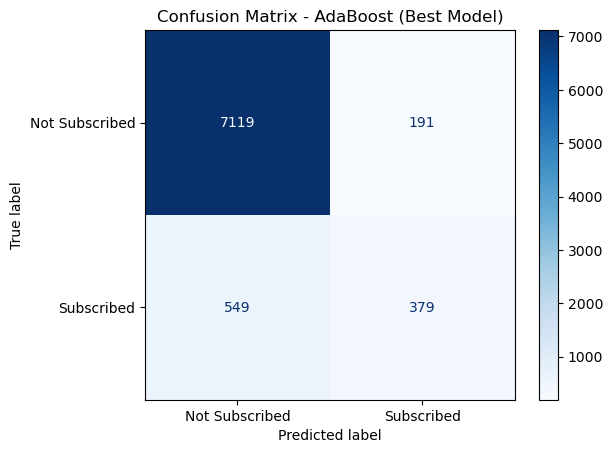

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_ada)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=['Not Subscribed', 'Subscribed']).plot(cmap='Blues')

plt.title("Confusion Matrix - AdaBoost (Best Model)")
plt.show()